In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Load mnist data

In [16]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### show one of the picture of mnist

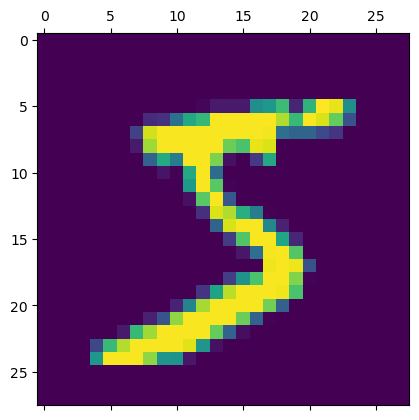

In [18]:
plt.matshow(X_train[0])

In [19]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [20]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [21]:
X_train_flattened = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_flattened = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [22]:
X_train_flattened = sx.fit_transform(X_train_flattened)
X_test_flattened = sx.fit_transform(X_test_flattened)

y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
def batch_gradient_decent(X, y, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    total_samples = X.shape[0]

    w = np.ones(shape=number_of_features)
    b = 0

    epoch_list = []
    cost_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(1/total_samples)*(X.T.dot(y - y_predicted))
        b_grad = -(1/total_samples)*np.sum(y - y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y - y_predicted))

        if i%10 == 0:
            print(cost)
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [33]:
print(X_train_flattened.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [36]:
w, b, cost, cost_list, epoch_list = batch_gradient_decent(X_train_flattened, y_train,500)
b

10767.37127307907
105.02202321537615
64.73535946853049
44.835357061304116
34.032864678487805
27.62764097778269
23.495942441137316
20.633365792730068
18.536267549728414
16.934241918730063
15.671321488243809
14.651271040565941
13.811180866309845
13.107977292357772
12.511089477374654
11.998208101476779
11.552690297450154
11.161894650745142
10.816071377005137
10.507599957803839
10.230452795898234
9.979810481625314
9.75178127482915
9.543193659247063
9.351440991848245
9.174363830229064
9.01015986244673
8.857314294999647
8.714545567439634
8.580762664232434
8.455031283825884
8.336546831181725
8.224612709775727
8.118622760755816
8.0180469706039
7.922419771987949
7.831330414904666
7.744415000398197
7.661349856868531
7.581846006289688
7.50564451965253
7.432512601373526
7.362240274034556
7.294637559697887
7.2295320737191515
7.166766962625571
7.106199130123617
7.047697705328645
6.9911427153913355
6.936423931236539


-1.6212737278509448

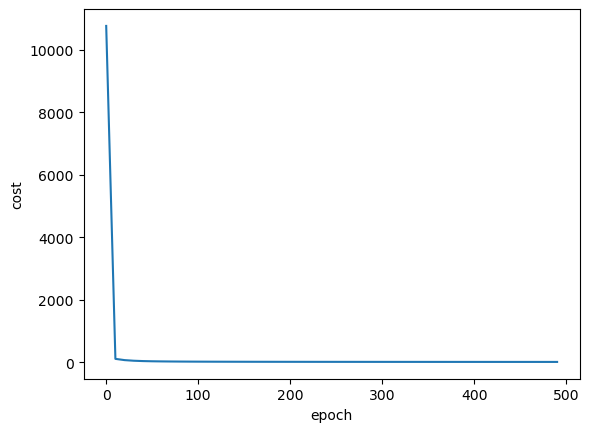

In [37]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [30]:
def predict(img_arr, w, b):
    img_arr_f = img_arr.reshape(img_arr.shape[0]*img_arr.shape[1])
    predict_val = np.dot(w.T, img_arr_f) + b
    return predict_val
    

In [31]:
predict(X_test[0], w, b)

1768.6019432140854